In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sklearn
import pickle

In [39]:
# Haar_Cascade Model
haar = cv2.CascadeClassifier('./models/haarcascade_frontalface_default.xml')
# SVM mode
model_SVM = pickle.load(open('./models/model_svm.pickle',mode='rb'))
# PCA model
PCA_model = pickle.load(open('./models/pca_dict.pickle',mode='rb'))

C:\Users\91881\Face Recognition web app\facerecognition\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\91881\Face Recognition web app\facerecognition\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [40]:
model_PCA = PCA_model['pca']
mean_face_Arr = PCA_model['mean_face']

In [47]:
# Reading the image
img = cv2.imread('./Test Images/getty_test.jpg')
#img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Converting it into Gray-scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Detecting face using Haar-cascade
faces= haar.detectMultiScale(gray,1.5,4)
predictions = []
for x,y,w,h in faces:
    #cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)
    roi = gray[y:y+h,x:x+w]
    # Normalization
    roi= roi/255.0
    # Resizing
    if roi.shape[1]>100:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
    else:
        roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
    # Flattening
    roi_reshape = roi_resize.reshape(1,10000)
    # Subtracting with mean face
    roi_mean = roi_reshape-mean_face_Arr
    # Eigen_image
    eigen_image = model_PCA.transform(roi_mean)
    # Eigen Image
    eig_image = model_PCA.inverse_transform(eigen_image)
    # Results
    results = model_SVM.predict(eigen_image)
    prob_Score = model_SVM.predict_proba(eigen_image)
    prob_Score_max = prob_Score.max()
    
    # Generating Report
    
    text = "%s : %d"%(results[0],prob_Score_max*100)
    
    #defining color based on results
    if results[0] == 'male':
        color = (255,255,0)
    elif results[0] == 'female':
        color = (255,0,255)
    
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.rectangle(img,(x,y-40),(x+w,y),color,-1)
    cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_PLAIN,3,(255,255,255),2)
    output = {
        'roi':roi,
        'eig_img':eig_image,
        'prediction_name':results[0],
        'score':prob_Score_max
    }
    predictions.append(output)


<function matplotlib.pyplot.show(close=None, block=None)>

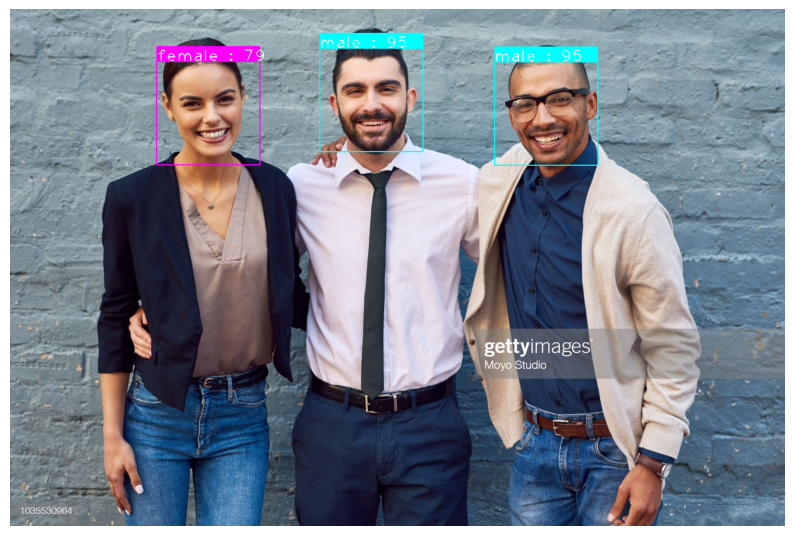

In [48]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show

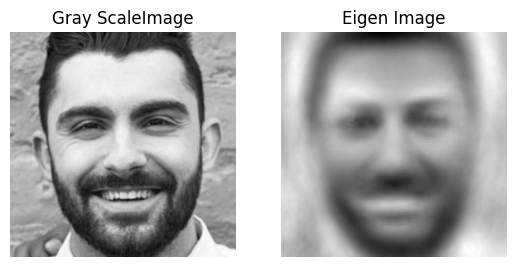

Predicted Gender = male
Predicted score = 95.71 %
----------------------------------------------------------------------------------------------------


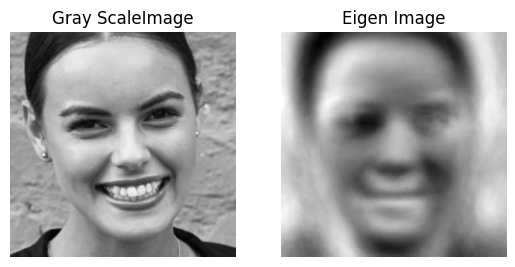

Predicted Gender = female
Predicted score = 79.73 %
----------------------------------------------------------------------------------------------------


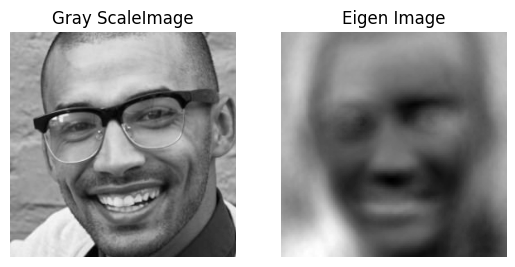

Predicted Gender = male
Predicted score = 95.86 %
----------------------------------------------------------------------------------------------------


In [49]:
def Generate_Report(predictions):
    #generate Report
    for i in range(len(predictions)):
        obj_gray = predictions[i]['roi'] #gray scale
        obj_eig = predictions[i]['eig_img'].reshape(100,100) #eigen image
        plt.subplot(1,2,1)
        plt.imshow(obj_gray,cmap='gray')
        plt.title('Gray ScaleImage')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(obj_eig,cmap='gray')
        plt.title('Eigen Image')
        plt.axis('off')

        plt.show()
        print('Predicted Gender =',predictions[i]['prediction_name'])
        print('Predicted score = {:,.2f} %'.format(predictions[i]['score']*100))

        print('-'*100)